### Time Series Forecasting using LSTM and GRU
In this notebook will use LSTM & GRU for predicting the price of stocks of Google for the year 2017

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

## Helper Functions for Plotting Predictions and Calculating RMSE

In [33]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Close')
    plt.plot(predicted, color='blue',label='open')
    plt.title('Google Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

## Getting the data

In [34]:
# First, we get the data
dataset = pd.read_csv('/content/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [35]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.0,4.282008e+02,2.363200e+02,131.39,247.775,310.48,572.140,1083.02
High,3019.0,4.318356e+02,2.375141e+02,134.82,250.190,312.81,575.975,1086.49
Low,3019.0,4.241303e+02,2.349237e+02,123.77,244.035,307.79,565.900,1072.27
Close,3019.0,4.280440e+02,2.363432e+02,128.85,247.605,310.08,570.770,1085.09
Volume,3019.0,3.551504e+06,3.038599e+06,521141.00,1760854.000,2517630.00,4242182.500,41182889.00


Slpitting dataset to train set (Before 2017) and test set (2017 and beyond)

In [36]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

Visualizing the data

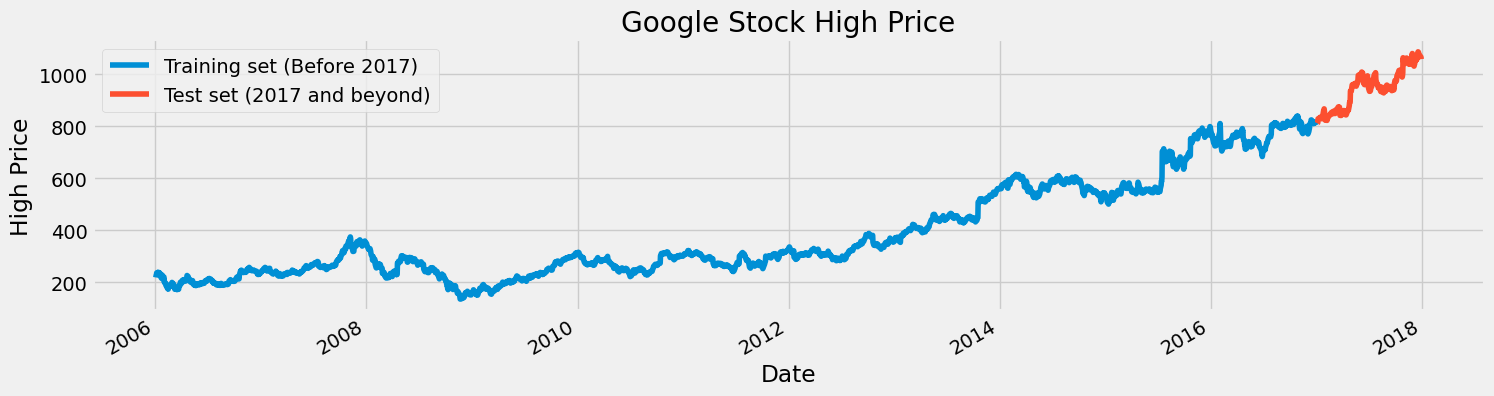

In [37]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Google Stock High Price')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

## Data Preprocessing

Scaling the training set

In [38]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output. So for each element of training set, we have 60 previous training set elements

In [39]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i-1,0]) # Access the previous element for y_train
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping X_train for efficient modelling

In [40]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## LSTM Model

In [41]:
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=7, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=7, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=7, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=7))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - loss: 0.0511
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0094
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.0097
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0079
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0060
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0059
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0057
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 0.0049
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - loss: 0.0050
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0051



## Make preductuion with LSTM model

In [42]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [43]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


Visualizing the results

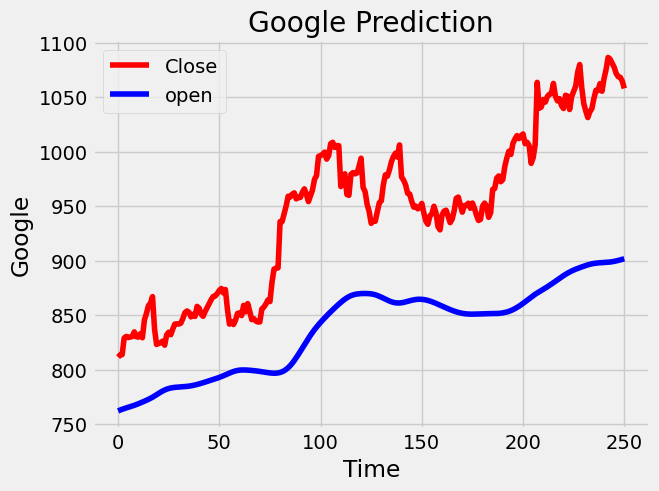

In [44]:
plot_predictions(test_set,predicted_stock_price)

Evaluating LSMT Model

In [45]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 115.06797436783081.


## GRU Model

In [46]:
regressorGRU = Sequential()

# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=7, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=7, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Third GRU layer
regressorGRU.add(GRU(units=7, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Fourth GRU layer
regressorGRU.add(GRU(units=7, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=10,batch_size=150)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 0.1438
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0654
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0357
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0123
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0078
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0076
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 0.0072
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0070
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0075
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0078



## Make preductuion with GRU model

In [47]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


Visualizing the Results

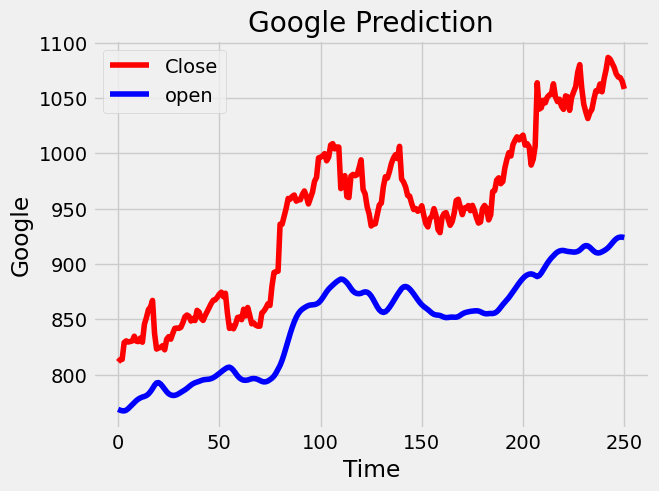

In [48]:
plot_predictions(test_set,GRU_predicted_stock_price)

Evaluating GRU Model

In [49]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 102.23747663404048.
